
# Example usage of fixed grid Fourier integration

This notebook shows how `neffint.fourier_integral_fixed_sampling` can be used to calculate Fourier integrals. This function is well suited for computing the Fourier integrals of functions on a already defined frequency grid which captures all important features of the function to be transformed. More precisely, interpolating the function over the given frequencies should give an interpolating polynomial which closely approximates the function itself.


#### Do imports

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import ArrayLike

import neffint as nft

#### Define some functions to measure error

This is mainly for plotting later.

In [8]:
def relative_diff(x: float, y: float) -> float:
    """Relative difference"""
    if max(abs(x), abs(y)) == 0:
        return 0
    return abs(x-y)/max(abs(x), abs(y))
relative_diff = np.vectorize(relative_diff)

def absolute_diff(x: ArrayLike, y: ArrayLike):
    """Absolute difference"""
    return np.abs(x-y)

#### Define a function

Here, we choose a function where we know analytically what the Fourier integral is, for testing purposes. Of course, in a real setting, one would choose a function without any analytically known Fourier integral.

In [9]:
def inv_sqrt(f: ArrayLike) -> ArrayLike:
    return 1 / np.sqrt(2*np.pi*f)

# The analytic fourier integral of inv_sqrt
def inv_sqrt_analytic_integral(t: ArrayLike):
    return np.sqrt(np.pi / (2 * t))


#### Define frequencies and times
Define some frequencies that catch the most important features for the function to be transformed, and calculate the function for those times.

Also define the times you want to calculate the integral for.

In [10]:
frequencies = np.logspace(-10,20,1000)
times = np.logspace(-15, 0, 100)

func_arr = inv_sqrt(frequencies)

print(f"""
Important: frequencies is a 1D array, and its length must be equal to the first dimension of func_arr. This is the case here:
 frequencies.shape = {frequencies.shape}
 func_arr.shape = {func_arr.shape}

times must also be a 1D array, and can have any length:
 times.shape = {times.shape}
""")


Important: frequencies is a 1D array, and its length must be equal to the first dimension of func_arr. This is the case here:
 frequencies.shape = (1000,)
 func_arr.shape = (1000,)

times must also be a 1D array, and can have any length:
 times.shape = (100,)



#### Compute Fourier integral

Input the arrays defined above.

The parameter `pos_inf_correction_term` enables using a Taylor expansion around the final func value to add a correction term for the part of the integral above the highest frequency and up to $+\infty$.  The corresponding `neg_inf_correction_term` does the same from the lowest (closest to $-\infty$) frequency to $-\infty$. In our case here, we will not use the `neg_inf_correction_term`, as we only integrate over the half-range $(0, +\infty)$.

The `interpolation` parameter must be `"pchip"` or `"linear"`, and selects an algorithm to interpolate the function data before the integral. `"pchip"` should be a good choice in most cases.

In [11]:
transform_arr = nft.fourier_integral_fixed_sampling(
    times=times,
    frequencies=frequencies,
    func_values=func_arr,
    pos_inf_correction_term=True,
    neg_inf_correction_term=False,
    interpolation="pchip" # Feel free to change to "linear"
)

# Also make an array of the analytically expected values, for comparison
transform_arr_analytic = inv_sqrt_analytic_integral(times)

#### Plot the results
See the comments for lines that can be changed for other interesting plots.

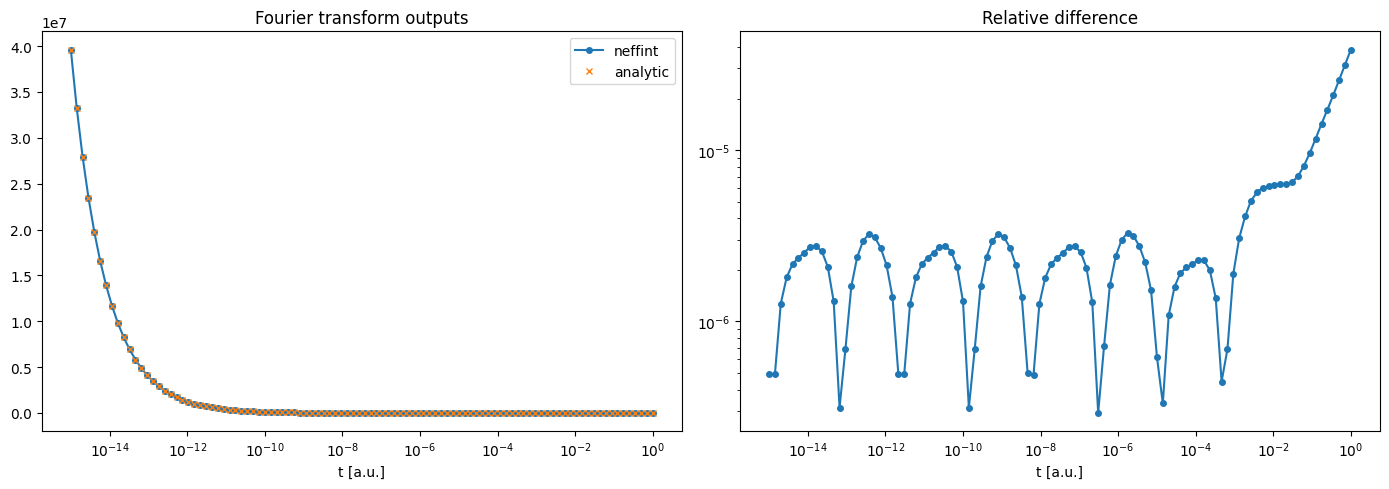

In [12]:
# Select component to plot, feel free to change np.real to e.g. np.imag, np.abs, or np.angle
f1 = np.real(transform_arr)
f2 = np.real(transform_arr_analytic)

# Select a difference metric, either relative_diff or absolute_diff
diff = relative_diff 


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))
ax1.plot(times, f1, "-o", markersize=4, label="neffint")
ax1.plot(times, f2, "x", markersize=4, label="analytic")
ax1.semilogx() # Feel free to change to ax1.loglog
ax1.legend()
ax1.set_title("Fourier transform outputs")
ax1.set_xlabel("t [a.u.]")

ax2.plot(times, diff(f1, f2), "-o", markersize=4)
ax2.loglog()
ax2.set_title(diff.__doc__)
ax2.set_xlabel("t [a.u.]")

plt.tight_layout()
plt.show()